<a href="https://colab.research.google.com/github/BetoACE/Python.-De-cero-a-ML/blob/main/%C3%81rbol_de_decisi%C3%B3n_ML_UNAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Árbol de decisión

En este notebook haremos un clasificador de árbol de decisiones para predecir la seguridad del automóvil implementando la clasificación de árbol de decisiones con Python y Scikit-Learn.

Créditos: Enrique Ubaldo


#  Introducción al algoritmo del árbol de decisión


El algoritmo del árbol de decision es uno de los algoritmos de machine learning más conocidos. Usar una estructura de arbol y sus posibles combinaciones para resolver problemas en particular. Pertenece a la clase de algoritmos de aprendizaje supervisado en los que se puede utilizar tanto con fines de clasificación como de regresión.

Un árbol de decisión es una estructura que incluye un nodo raíz, ramas y nodos hoja. Cada nodo interno denota una prueba en un atributo, cada rama denota el resultado de una prueba y cada nodo hoja contiene una etiqueta de clase. El nodo superior del árbol es el nodo raíz.

Hacemos algunas suposiciones al implementar el algoritmo Decision-Tree que son las siguientes:

Al principio, todo el conjunto de entrenamiento se considera como la raíz.

* Los valores de características deben ser categóricos. Si los valores son continuos, se discretizan(dividirlos en rangos) antes de construir el modelo.
* Los registros se distribuyen recursivamente sobre la base de los valores de los atributos.
* Los atributos como raíz o nodo interno del árbol, se utiliza algún enfoque estadístico.

# Arboles de regresion y clasificacion (CART) 🌳

El algoritmo CART proporciona una base para otros algoritmos importantes, como árboles de decisión empaquetados, bosques aleatorios y árboles de decisión potenciados. En este núcleo, resolveré un problema de clasificación. Por lo tanto, me referiré al algoritmo también como problema de Clasificación del Árbol de Decisión.

# Medidas de selección de atributos

El desafío principal en la implementación del árbol de decisiones es identificar los atributos que consideramos como el nodo raíz y cada nivel. Este proceso se conoce como selección de atributos. Hay diferentes medidas de selección de atributos para identificar el atributo que se puede considerar como el nodo raíz en cada nivel.

Hay 2 medidas populares de selección de atributos. Son los siguientes:-

* Entropía

* Índice de Gini

# ¡Vamos al código! ⏭


In [1]:
# importamos librerías

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

In [2]:
#cargamos el conjunto de datos

df = pd.read_csv('car_evaluation.csv')

In [3]:
# Analisis exploratorio

df.info()

df.isnull().sum()

df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
5,vhigh,vhigh,2,2,big,low,unacc
6,vhigh,vhigh,2,2,big,med,unacc
7,vhigh,vhigh,2,2,big,high,unacc
8,vhigh,vhigh,2,4,small,low,unacc
9,vhigh,vhigh,2,4,small,med,unacc


In [4]:
#Renombrar las columnas

col_names=['buying','maint', 'doors','persons','lug_boot', 'safety','class']

df.columns = col_names

In [ ]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
pd.value_counts(df['safety'])

<ipython-input-5-7be330a353a2>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['safety'])


,count
safety,
med,576
high,576
low,575


In [6]:
#Separar los datos en caracteristicas (x) y la variable objetivo (y)

X=df.drop(['class'], axis=1)

Y=df['class']

In [7]:
# Divida los datos en conjuntos separados de entrenamiento y prueba

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [8]:
#Como quedan organizados los conjuntos de datos

X_train.shape, X_test.shape



((1381, 6), (346, 6))

In [9]:
#Codificando las variables categóricas
!pip install category-encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.0 MB/s eta 0:00:00


In [10]:
import category_encoders as ce

In [11]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [12]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,1,1,1,1,1,1
900,2,2,2,2,1,2
1708,3,3,3,1,2,3
705,4,4,4,1,3,2
678,4,4,2,1,3,2


# Algoritmo CART

In [14]:
#importamos el módulo

from sklearn.tree import DecisionTreeClassifier


# ocupar el criterio de Gini

clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [15]:
# Predecir los resultados del conjunto de pruebas con el índice de gini de criterio¶


y_pred_entropy = clf_entropy.predict(X_test)

#¿Cómo le fue al modelo?

Validemos la presición del modelo

In [17]:
#Verifique la puntuación de precisión con el índice de gini de criterio

from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_entropy)))



Model accuracy score with criterion entropy index: 0.7688


# ¡veámos las ramas!

[Text(0.3333333333333333, 0.875, 'x[5] <= 1.5\nentropy = 1.19\nsamples = 1381\nvalue = [307, 54, 972, 48]'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 467\nvalue = [0, 0, 467, 0]'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[3] <= 1.5\nentropy = 1.466\nsamples = 914\nvalue = [307, 54, 505, 48]'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 299\nvalue = [0, 0, 299, 0]'),
 Text(0.6666666666666666, 0.375, 'x[1] <= 2.5\nentropy = 1.624\nsamples = 615\nvalue = [307, 54, 206, 48]'),
 Text(0.5, 0.125, 'entropy = 1.147\nsamples = 301\nvalue = [136, 0, 157, 8]'),
 Text(0.8333333333333334, 0.125, 'entropy = 1.711\nsamples = 314\nvalue = [171, 54, 49, 40]')]

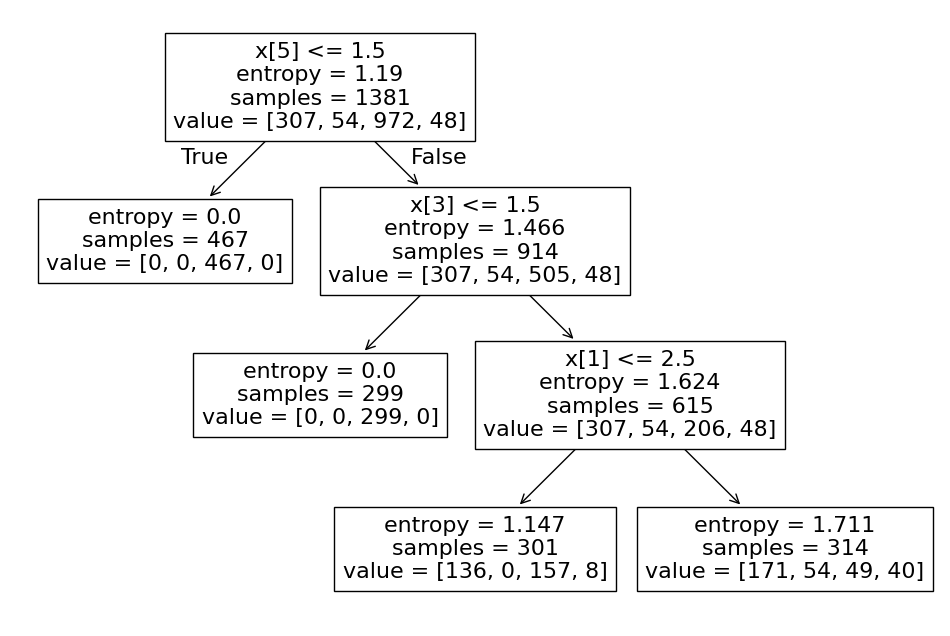

In [18]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_entropy.fit(X_train, y_train))

In [19]:
from sklearn.tree import export_text
rules = export_text(clf_entropy, feature_names=X.columns.tolist())
print(rules)


|--- safety <= 1.50
|   |--- class: unacc
|--- safety >  1.50
|   |--- persons <= 1.50
|   |   |--- class: unacc
|   |--- persons >  1.50
|   |   |--- maint <= 2.50
|   |   |   |--- class: unacc
|   |   |--- maint >  2.50
|   |   |   |--- class: acc

